In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')

In [95]:
df=pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [96]:
df.shape

(167, 10)

In [97]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [98]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [99]:
df.nunique()

country       167
child_mort    139
exports       147
health        147
imports       151
income        156
inflation     156
life_expec    127
total_fer     138
gdpp          157
dtype: int64

In [100]:
df2=df.drop(['country'],axis=1)
df2

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


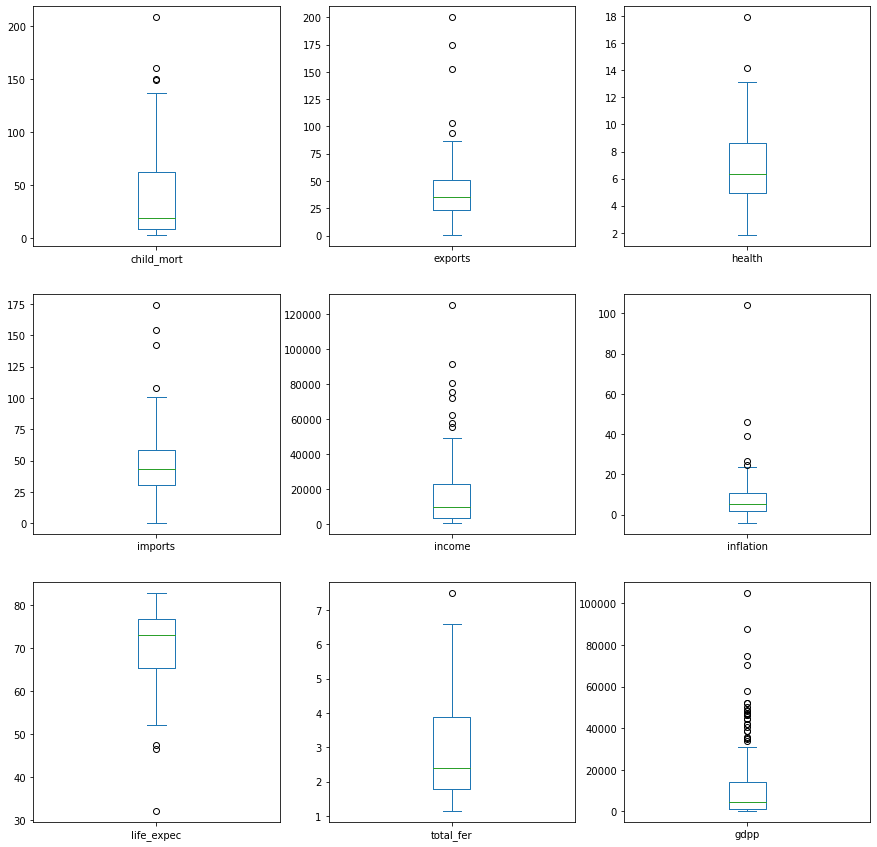

In [101]:
df2.plot(kind ='box',subplots =True,layout =(3,3),figsize = (15,15))
plt.show()

<AxesSubplot:>

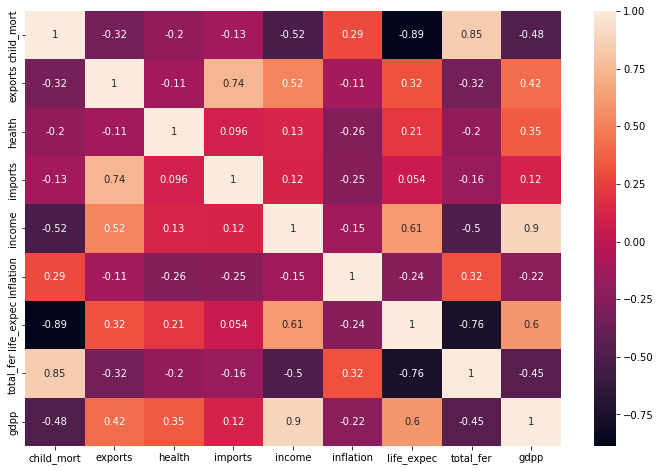

In [102]:
plt.figure(figsize= (12,8))
sns.heatmap(df.corr(), annot = True)

In [103]:
#scaling data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaled=scaling.fit_transform(df2)

In [104]:
scaleddf=pd.DataFrame(scaled,columns=df2.columns)
#print scaled dataset
scaleddf.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


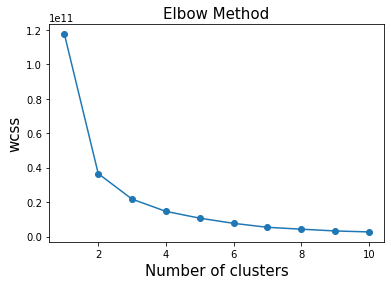

In [105]:

#kmeans
from sklearn .cluster import KMeans
WCSS=[]

for i in range(1,11):
    kmean=KMeans(n_clusters=i,random_state=42)
    kmean.fit(df2)
    WCSS.append(kmean.inertia_)
plt.plot(range(1,11),WCSS,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('wcss',fontsize=15)
plt.show()

In [106]:
#predicting
kmeans=KMeans(n_clusters=3,random_state=42)
y_kmeans=kmeans.fit_predict(df2)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [107]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(df2)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


<AxesSubplot:xlabel='child_mort', ylabel='health'>

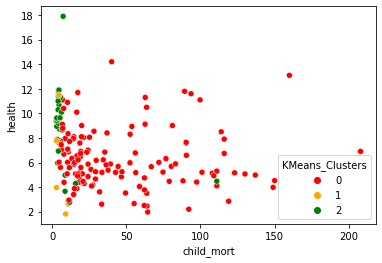

In [108]:
sns.scatterplot(kmeans_df['child_mort'],kmeans_df['health'],hue='KMeans_Clusters',data=kmeans_df,palette=['red','orange','green'])


<AxesSubplot:xlabel='child_mort', ylabel='total_fer'>

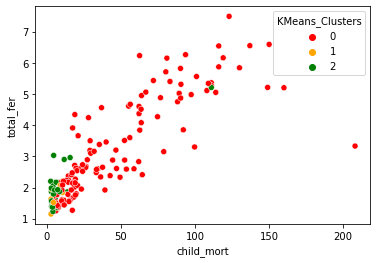

In [109]:
sns.scatterplot(kmeans_df['child_mort'],kmeans_df['total_fer'],hue='KMeans_Clusters',data=kmeans_df,palette=['red','orange','green'])


<AxesSubplot:xlabel='exports', ylabel='health'>

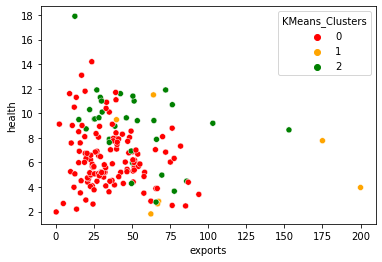

In [110]:
sns.scatterplot(kmeans_df['exports'],kmeans_df['health'],hue='KMeans_Clusters',data=kmeans_df,palette=['red','orange','green'])

<AxesSubplot:xlabel='KMeans_Clusters', ylabel='gdpp'>

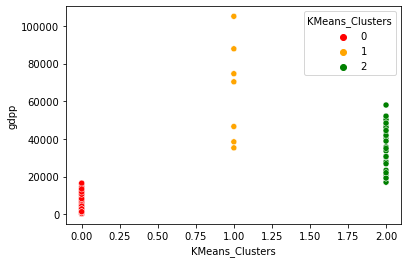

In [111]:
sns.scatterplot(kmeans_df['KMeans_Clusters'],kmeans_df["gdpp"],hue='KMeans_Clusters',data=kmeans_df,palette=['red','orange','green'])


<AxesSubplot:xlabel='income', ylabel='health'>

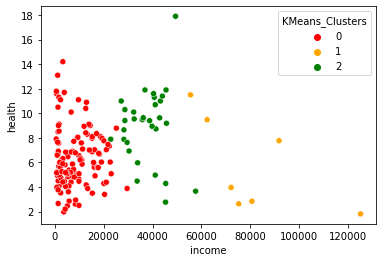

In [112]:
sns.scatterplot(kmeans_df['income'],kmeans_df["health"],hue='KMeans_Clusters',data=kmeans_df,palette=['red','orange','green'])


<AxesSubplot:xlabel='KMeans_Clusters', ylabel='child_mort'>

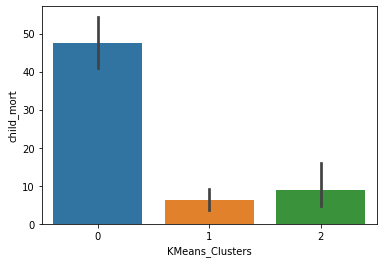

In [113]:
sns.barplot(x = 'KMeans_Clusters', y = 'child_mort', data=kmeans_df)


In [114]:
#undeveloped
undeveloped=kmeans_df[kmeans_df['KMeans_Clusters']==0]
print("Number of underdevolped countries",len(undeveloped))

Number of underdevolped countries 128


In [115]:
#developing
developing=kmeans_df[kmeans_df['KMeans_Clusters']==1]
print("Number of developing countries",len(developing))

Number of developing countries 7


In [116]:
#developed
developed=kmeans_df[kmeans_df['KMeans_Clusters']==2]
print("Number of developed countries",len(developed))

Number of developed countries 32


In [123]:
 #countries in cluster 0
country=df["country"]
df=pd.DataFrame({'KMeans_Clusters':df2['KMeans_Clusters'],'country':country})
country_cluster0=list(df[df['KMeans_Clusters']==0].country)
country_cluster0

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Fiji',
 'Gabon',
 'Gambia',
 'Georgia',
 'Ghana',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Kyrgyz Republic',
 'Lao',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'M

The above cluster 0, 128 no's of countries are in the direst need of aid.